In [ ]:
import os
import numpy as np
import pandas as pd

# Load Dataset

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download saurabhshahane/spotgen-music-dataset/versions/122

 95% 260M/274M [00:02<00:00, 115MB/s]
100% 274M/274M [00:02<00:00, 97.4MB/s]


In [ ]:
!unzip spotgen-music-dataset.zip -d data

Archive:  spotgen-music-dataset.zip
  inflating: data/SpotGenTrack/Data Sources/spotify_albums.csv  
  inflating: data/SpotGenTrack/Data Sources/spotify_artists.csv  
  inflating: data/SpotGenTrack/Data Sources/spotify_tracks.csv  
  inflating: data/SpotGenTrack/Features Extracted/low_level_audio_features.csv  
  inflating: data/SpotGenTrack/Features Extracted/lyrics_features.csv  


In [ ]:
tracks_dataset=pd.read_csv("data/SpotGenTrack/Data Sources/spotify_tracks.csv")

In [ ]:
tracks_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101939 entries, 0 to 101938
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         101939 non-null  int64  
 1   acousticness       101939 non-null  float64
 2   album_id           101939 non-null  object 
 3   analysis_url       101939 non-null  object 
 4   artists_id         101939 non-null  object 
 5   available_markets  101939 non-null  object 
 6   country            101939 non-null  object 
 7   danceability       101939 non-null  float64
 8   disc_number        101939 non-null  float64
 9   duration_ms        101939 non-null  float64
 10  energy             101939 non-null  float64
 11  href               101939 non-null  object 
 12  id                 101939 non-null  object 
 13  instrumentalness   101939 non-null  float64
 14  key                101939 non-null  float64
 15  liveness           101939 non-null  float64
 16  lo

In [ ]:
tracks_dataset.head()

,Unnamed: 0,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,preview_url,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type
0,0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,...,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,track
1,1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,...,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,track
2,2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,1.0,492840.0,...,https://p.scdn.co/mp3-preview/c8af28fb15185b18...,0.9440,79.565,4.0,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,4.0,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,track
3,3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,...,https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...,0.9380,112.822,3.0,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,1.0,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,track
4,4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.460,1.0,558880.0,...,https://p.scdn.co/mp3-preview/32be593c0eb82868...,0.9430,81.260,4.0,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,2.0,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,track


In [ ]:
data=tracks_dataset.iloc[:,1:]

In [ ]:
data.drop(["duration_ms","time_signature","disc_number","track_number","key","mode"],axis=1,inplace=True)

In [ ]:
data.head()

,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,energy,href,id,...,playlist,popularity,preview_url,speechiness,tempo,track_href,track_name_prev,uri,valence,type
0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,0.606,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,5qljLQuKnNJf4F4vfxQB0V,...,Hipsteribrunssi,28.0,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,0.0262,115.018,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,track
1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,0.308,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,3VAX2MJdmdqARLSU5hPMpm,...,Animal Stories,31.0,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,0.9220,115.075,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,track
2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,0.931,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,1L3YAhsEMrGVvCgDXj2TYn,...,Best Of British Comedy,31.0,https://p.scdn.co/mp3-preview/c8af28fb15185b18...,0.9440,79.565,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,track
3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,0.126,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,6aCe9zzoZmCojX7bbgKKtf,...,Short Stories,14.0,https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...,0.9380,112.822,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,track
4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.460,0.942,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,1Vo802A38tPFHmje1h91um,...,Best Of British Comedy,32.0,https://p.scdn.co/mp3-preview/32be593c0eb82868...,0.9430,81.260,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,track


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
acousticness,101939.0,0.352124,0.334855,0.0,0.0407,0.238000,0.6450,0.996
danceability,101939.0,0.586015,0.177724,0.0,0.4800,0.610000,0.7140,0.989
energy,101939.0,0.586479,0.260170,0.0,0.4110,0.629000,0.7980,1.000
instrumentalness,101939.0,0.148776,0.304024,0.0,0.0000,0.000037,0.0344,1.000
liveness,101939.0,0.197640,0.175391,0.0,0.0956,0.124000,0.2410,0.999
loudness,101939.0,-9.462720,6.198508,-60.0,-11.1490,-7.599000,-5.5090,2.719
popularity,101939.0,39.782311,16.790769,0.0,29.0000,41.000000,52.0000,97.000
speechiness,101939.0,0.128841,0.203324,0.0,0.0364,0.050600,0.1040,0.969
tempo,101939.0,118.358527,30.224074,0.0,95.9730,118.067000,136.0450,244.035
valence,101939.0,0.482813,0.261690,0.0,0.2710,0.477000,0.6930,0.993


# Training

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
X = data.select_dtypes(np.number)
number_cols = list(X.columns)

Finding optimum K

In [ ]:
cost=[]
for i in range(1,100):
  model=KMeans(n_clusters=i,verbose=False)
  model.fit(X)
  cost.append(model.inertia_)

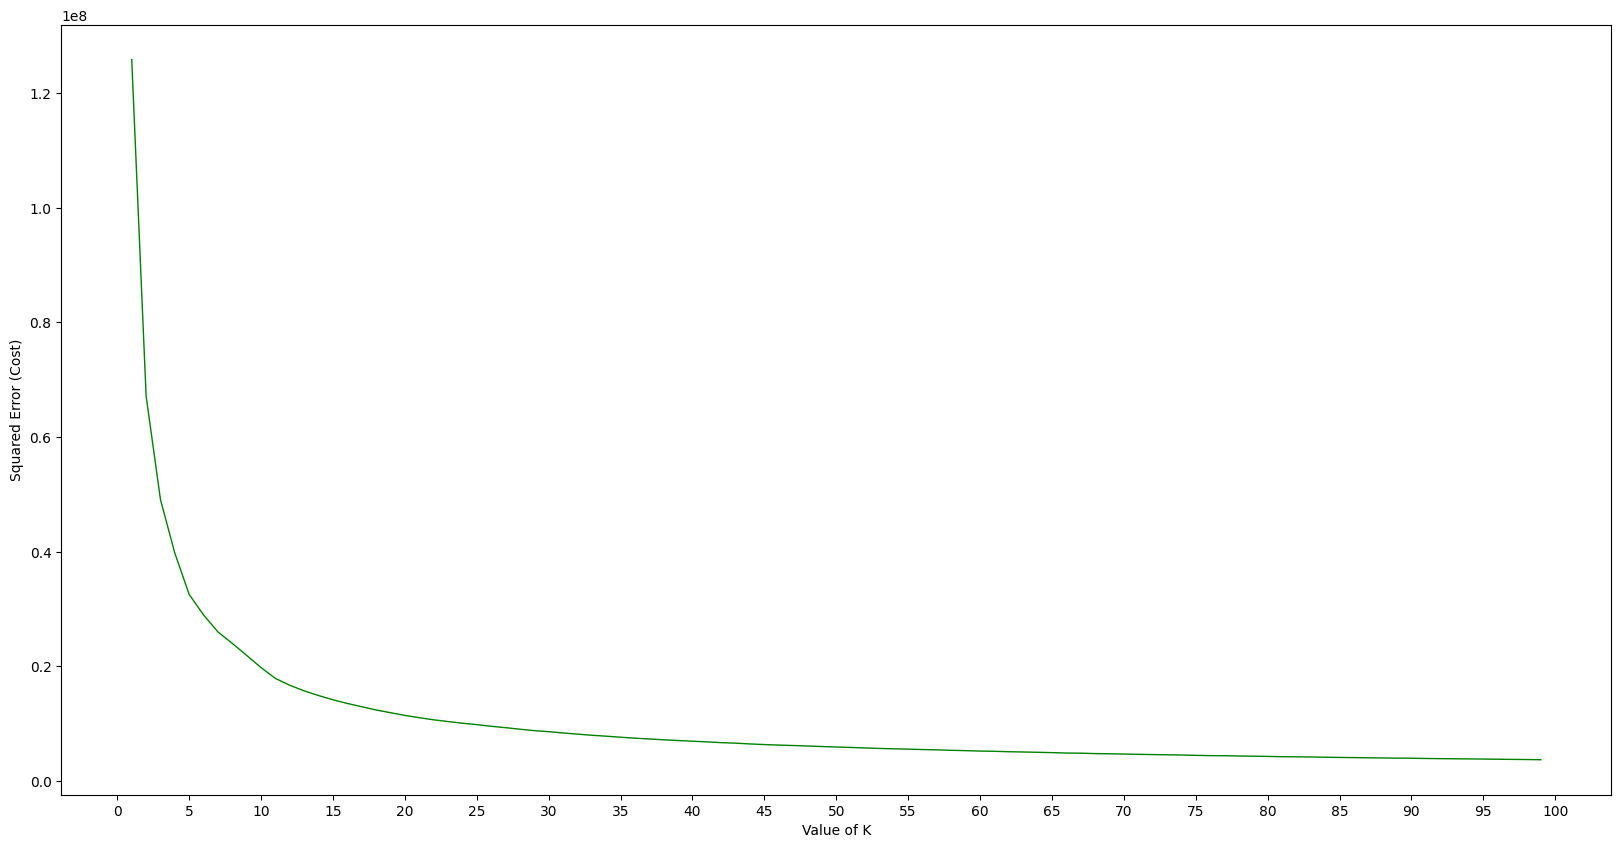

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.xticks(range(0,105,5))
plt.plot(range(1, 100), cost, color ='g', linewidth ='1')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show()

In [ ]:
cost=[]
for i in range(1,30):
  model=KMeans(n_clusters=i,verbose=False)
  model.fit(X)
  cost.append(model.inertia_)

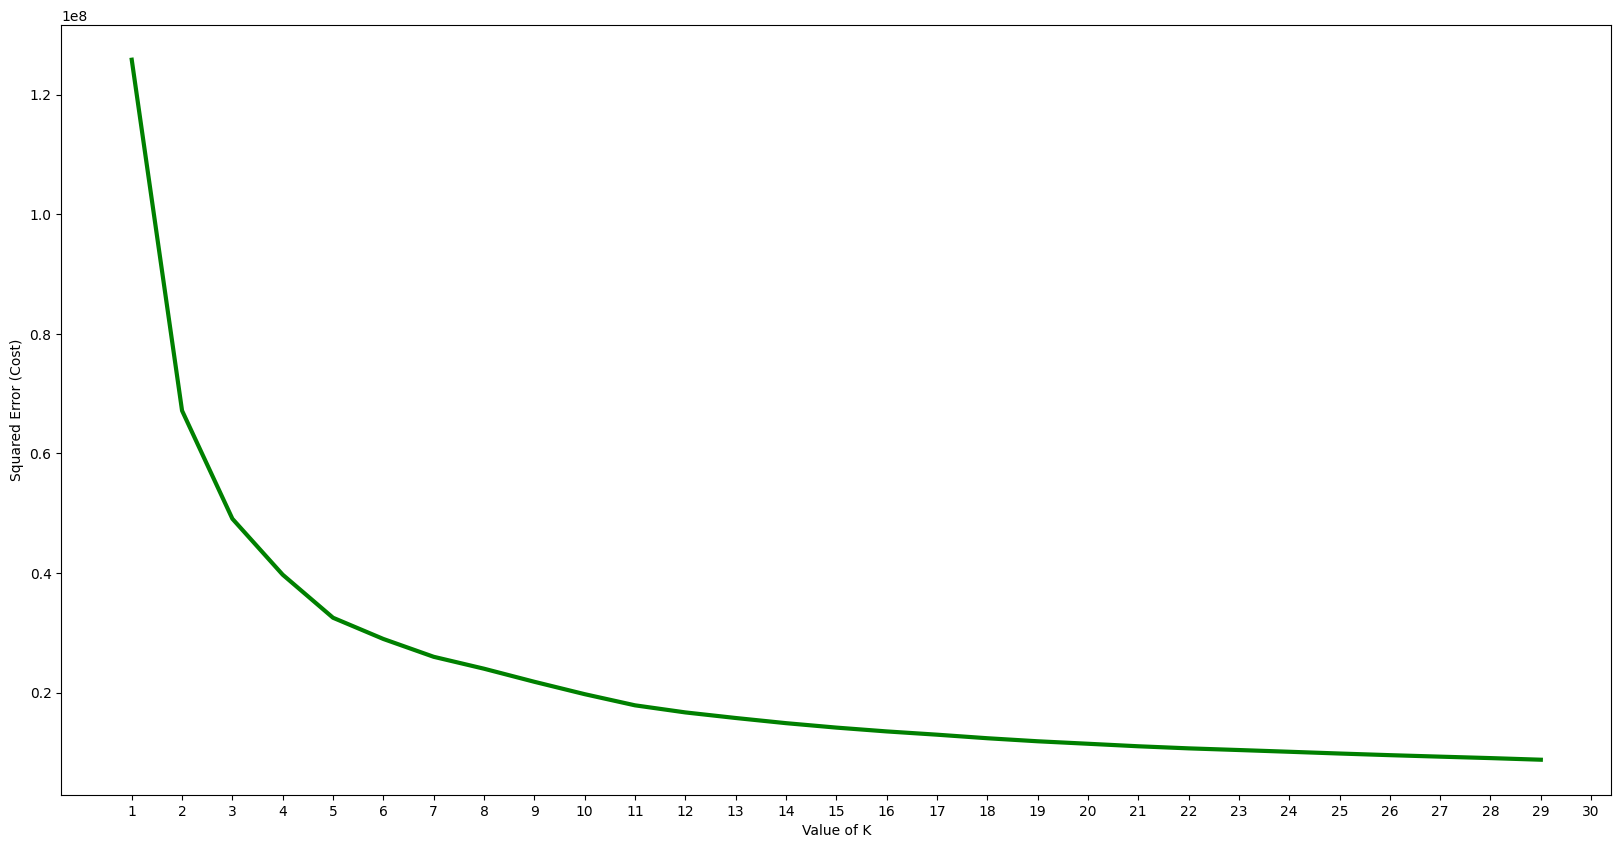

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.xticks(range(1,31,1))
plt.plot(range(1, 30), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouettes = []
for k in range(10, 25):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    silhouettes.append(silhouette_score(X, labels, metric = 'euclidean'))


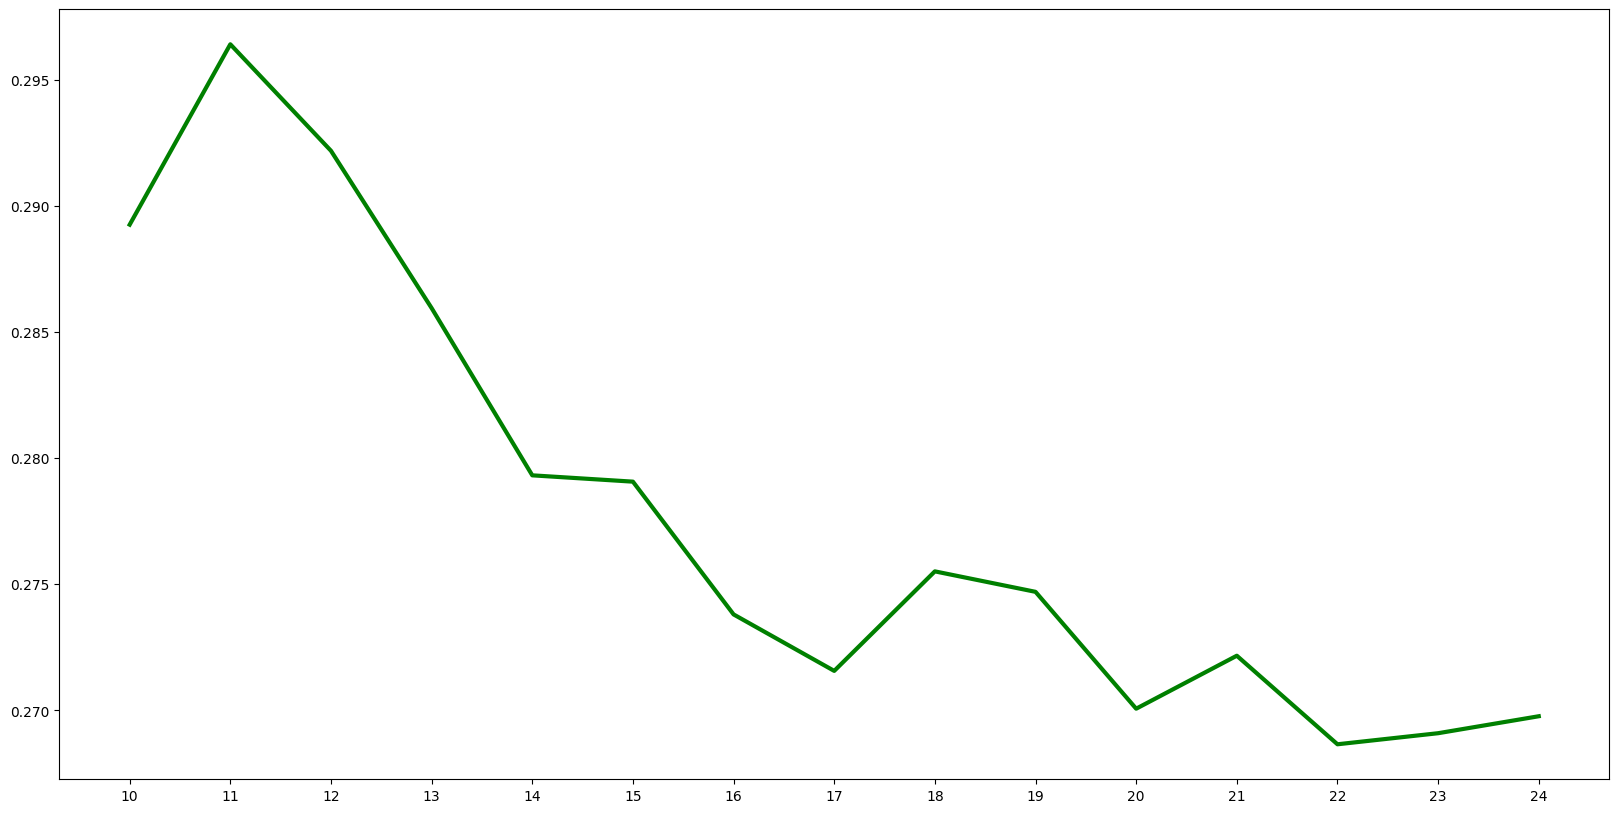

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(range(10,25,1))
plt.plot(range(10,25),silhouettes, color ='g', linewidth ='3')
plt.show()

Training with optimum K

In [ ]:
model=KMeans(n_clusters=11,verbose=False)

In [ ]:
model.fit(X)
labels = model.predict(X)
data['cluster_label'] = labels

In [25]:
data.head()

,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,energy,href,id,...,popularity,preview_url,speechiness,tempo,track_href,track_name_prev,uri,valence,type,cluster_label
0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,0.606,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,5qljLQuKnNJf4F4vfxQB0V,...,28.0,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,0.0262,115.018,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,track,4
1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,0.308,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,3VAX2MJdmdqARLSU5hPMpm,...,31.0,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,0.9220,115.075,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,track,4
2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,0.931,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,1L3YAhsEMrGVvCgDXj2TYn,...,31.0,https://p.scdn.co/mp3-preview/c8af28fb15185b18...,0.9440,79.565,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,track,7
3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,0.126,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,6aCe9zzoZmCojX7bbgKKtf,...,14.0,https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...,0.9380,112.822,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,track,8
4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.460,0.942,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,1Vo802A38tPFHmje1h91um,...,32.0,https://p.scdn.co/mp3-preview/32be593c0eb82868...,0.9430,81.260,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,track,7


# Save Data to Firebase

In [ ]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

In [ ]:
import firebase_admin
from firebase_admin import credentials

cred = credentials.Certificate("")
firebase_admin.initialize_app(cred,{'databaseURL':''})

In [ ]:
ref=db.reference('dataset/')

In [ ]:
for i in range(len(data)):
  dataset=ref.child(str(i+1))
  temp=dict(data.iloc[i])
  dataset.set({
      "id":temp['id'],
      "name":temp['name'],
      "cluster_label":int(temp['cluster_label']),
      "playlist":temp['playlist'],
      "acousticness":temp['acousticness'],
      "album_id":temp['album_id'],
      "artists_id":temp['artists_id'],
      "available_markets":temp['available_markets'],
      "country":temp['country'],
      "uri":temp['uri'],
      "lyrics":temp['lyrics']
      })

## Save data as csv

In [ ]:
data.to_csv("labeled_data.csv", encoding="UTF-8")

# Recommendation

In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 15.0 MB/s eta 0:00:00


Get image from url

In [ ]:
import requests
import shutil

In [ ]:
uri_list=list(data[data['name']=="Zombie"]['uri'])

In [ ]:
uri_list

['spotify:track:4wlaVW8HUb12uqQC2nqQrv',
 'spotify:track:1NNbekhtCw2UhHgcvuxe4t',
 'spotify:track:5F0oU6oawDaAdNAaRX0I8z',
 'spotify:track:1QHfuEyKqH35Qf7iJIl0Wd',
 'spotify:track:0qJCAToUWH6dZfGZmoP7bl',
 'spotify:track:1TwbzKMxFBExaDEUWqQ832',
 'spotify:track:1eadPrzB2P0ikQcqhKSAtv',
 'spotify:track:11GDQVqIEKAB4QKOcIVOvG',
 'spotify:track:1vNoA9F5ASnlBISFekDmg3',
 'spotify:track:3yo43Xwn5bPdVqd1NDmlO5']

In [ ]:
song_link="https://open.spotify.com/track/"+uri_list[-1].split(":")[-1]
x = requests.get(song_link)
image_link=str(x.content).split('img')[1]
image_link=image_link.split('src="')[1]
image_link=image_link.split('"')[0]
image_link,song_link

('https://i.scdn.co/image/ab67616d00001e02c6345caefe2df18460c84876',
 'https://open.spotify.com/track/3yo43Xwn5bPdVqd1NDmlO5')

In [ ]:
path = 'music_image.png'

r = requests.get(image_link, stream=True)
if r.status_code == 200:
    with open(path, 'wb') as f:
        r.raw.decode_content = True
        shutil.copyfileobj(r.raw, f)
        print('Image Downloaded Successfully')

Image Downloaded Successfully
